In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from autoplan.generator import Generator
from grammars.pythagorean.program import Program, PythagoreanLabels
from autoplan.dataset import build_synthetic_dataset
from autoplan.models import RNN
from autoplan.trainer import Trainer
from autoplan.token import JavaTokenizer
from tqdm import tqdm
import torch
import pandas as pd

# device = torch.device('cpu')
device = torch.device('cuda:0')

In [15]:
program_grammar = Program()
generator = Generator(grammar=program_grammar)
program, label = generator.generate()
print(program)
print(label)


            public class PythagoreanTheorem extends ConsoleProgram {{
                public void run() {{
                    
        print("Enter values to compute the Pythagorean Theorem.");
        double x = readDouble("x:");
        double y = readDouble("y:");
        double z = Math.sqrt(x * x + y * y);
        print("z:" + z);
        
                }}
            }}
        
PythagoreanLabels.UsesInlineCalculation


In [16]:
dataset = build_synthetic_dataset(
    N_train=10000, 
    N_val=1000, 
    tokenizer=JavaTokenizer(),
    grammar=program_grammar, 
    label_set=PythagoreanLabels)

In [17]:
trainer = Trainer(dataset, RNN, device=device)

100%|██████████| 100/100 [01:13<00:00,  1.32it/s]


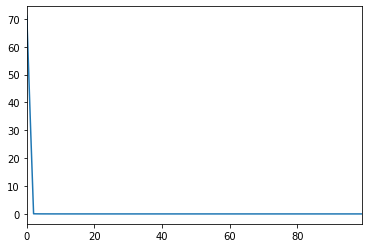

In [18]:
losses = []
for _ in tqdm(range(100)):
    losses.append(trainer.train_one_epoch())
pd.Series(losses).plot()

In [20]:
trainer.eval()

1.0